In [231]:
import numpy as np
from scipy.optimize import minimize, LinearConstraint, Bounds
import sympy as sym
from sympy import Rational

In [232]:
xx, yy = sym.symbols('x y')
U = 4 * (xx - 3) ** Rational(5, 6) * (yy + 2) ** Rational(1, 6)

In [233]:
U

4*(x - 3)**(5/6)*(y + 2)**(1/6)

In [234]:
# p = int(input('p = '))
# q = int(input('q = '))
# I = int(input('I = '))

p = 2
q = 19
I = 2070

In [235]:
def F(data):
    x_in, y_in = data
    return -(4*(x_in-3)**Rational(5, 6) * (y_in+2)**Rational(1, 6))

In [236]:
def gr(data):
    x, y = data

    vals = np.zeros_like(data)
    vals[0] = -eval(str(U.diff(xx)))
    vals[1] = -eval(str(U.diff(yy)))

    return vals

In [237]:
print("Предельная полезность x:")
display(U.diff(xx))

print("Предельная полезность y: ")
display(U.diff(yy))

Предельная полезность x:


10*(y + 2)**(1/6)/(3*(x - 3)**(1/6))

Предельная полезность y: 


2*(x - 3)**(5/6)/(3*(y + 2)**(5/6))

In [238]:
x_min = 1
y_min = 6
x_max, y_max = np.inf, np.inf

In [239]:
linear_constraint = LinearConstraint ([p, q], -np.inf, I)
bounds = Bounds([x_min, y_min], [x_max, y_max])

In [240]:
x0 = np.array([10.0, 10.0])
res = minimize(F, x0, jac=gr, constraints=linear_constraint, bounds=bounds, options={'disp': True})
print(res.x)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -1840.90987075515
            Iterations: 13
            Function evaluations: 14
            Gradient evaluations: 13
[878.83215214  16.43872083]


In [241]:
print(f"Оптимальные значения x,y:", res.x[0], res.x[1])
print(f"Максимальное значение функции: ", -res.fun)

Оптимальные значения x,y: 878.8321521421514 16.438720826927835
Максимальное значение функции:  1840.90987075515


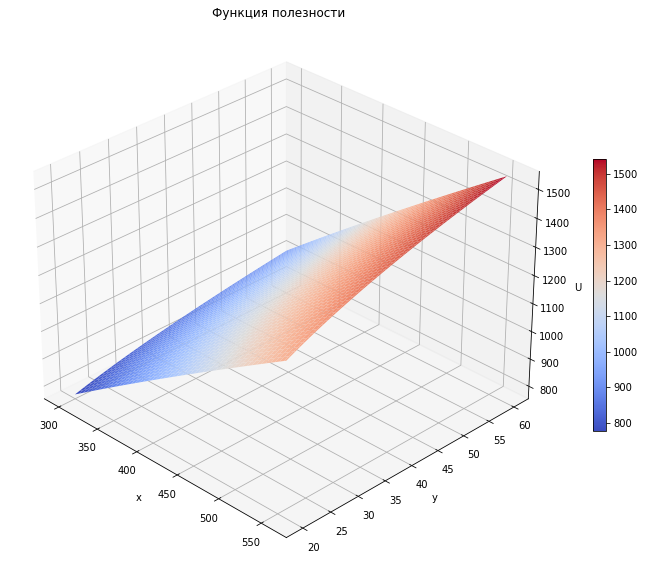

In [243]:
import matplotlib.pyplot as plt
from matplotlib import cm

fig, ax = plt.subplots(figsize=(15,10), subplot_kw={"projection": "3d"})
ax.view_init(30, -45)

X = np.linspace(300, 560, 100)
Y = np.linspace(20, 60, 200)
X, Y = np.meshgrid(X, Y)
Z = -F(np.array([X,Y]))

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5)
ax.set_title('Функция полезности')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('U')
plt.show()

In [244]:
def F(xy):
    x, y = xy
    a = (x - 3)
    a_out = np.sign(a) * (np.abs(a)) ** (5 / 6)
    b = (y+2)
    b_out = np.sign(b) * (np.abs(b)) ** (1 / 6)
    return 4 * a_out * b_out

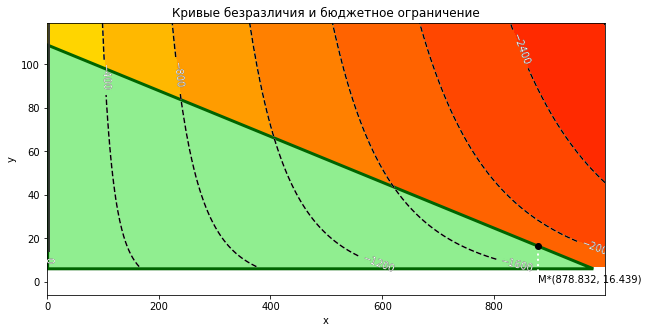

In [245]:
fig, ax = plt.subplots(figsize=(10,5))

X = np.arange(0, 1000, 1)
Y = np.arange(7, 120, 1)
X, Y = np.meshgrid(X, Y)
Z = -F(np.array([X, Y]))

ax.contourf(X, Y, Z, cmap='autumn')

adm = plt.Polygon([(x_min,y_min),(x_min, I/q-p*x_min/q),(I/p-q*y_min/p, y_min)], facecolor='lightgreen', edgecolor='darkgreen', alpha = 1, linewidth=3)
ax.add_patch(adm)

ax.set_title('Кривые безразличия и бюджетное ограничение')
ax.set_xlabel('x')
ax.set_ylabel('y')

cs_m = ax.contour(X, Y, Z, colors='white')
cs = ax.contour(X, Y, Z, colors='black')

plt.vlines(x=res.x[0], ymin=0, ymax=res.x[1], colors='white', ls=':', lw=2)
ax.plot(res.x[0], res.x[1], 'ko')
ax.text(res.x[0], 0, f'M*({res.x[0].round(3)}, {res.x[1].round(3)})')

ax.clabel(cs)
ax.clabel(cs_m)

plt.show()